In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("pima-indians-diabetes (4).csv")

In [4]:
data.shape

(768, 9)

In [5]:
values=data.values 

In [6]:
n_iterations=500
n_size=int(len(data)*.5)
stats=[]
for i in range(n_iterations):
    #prepare train and test set
    train=resample(values,n_samples=n_size)
    test=np.array([x for x in values if x.tolist() not in train.tolist()])
    model=DecisionTreeClassifier()
    model.fit(train[:,:-1],train[:,-1])
    y_pred=model.predict(test[:,:-1])
    score=accuracy_score(test[:,-1],y_pred)
    stats.append(score)

(array([  1.,   9.,  19.,  47.,  89., 105., 119.,  63.,  40.,   8.]),
 array([0.61440678, 0.62736957, 0.64033237, 0.65329516, 0.66625795,
        0.67922074, 0.69218354, 0.70514633, 0.71810912, 0.73107191,
        0.74403471]),
 <a list of 10 Patch objects>)

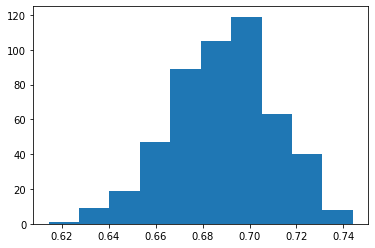

In [7]:
plt.hist(stats)


In [15]:
alpha=.95
p=((1-alpha)/2)*100
lower=max(0.0 ,np.percentile(stats,p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper=min(1,np.percentile(stats,p))
print("{}% confidence interval {} and {}".format(alpha*100,lower*100,upper*100))

95.0% confidence interval 64.28323490500416 and 72.68899537022048


In [9]:
p = (alpha+((1.0-alpha)/2.0)) * 100

In [10]:
print(p)

97.5
